## **Optimización de parámetros en redes neuronales**

Usando algoritmos genéticos se entrena los pesos de una red neuronal de tal forma que predice la operación XOR. Dadas las siguientes entradas

data_inputs = numpy.array([[1, 1],[1, 0],[0, 1],[0, 0]])

genera las siguientes salidas

data_outputs = numpy.array([0,1,1,0])

In [ ]:
# TODO
#Capa de entrada: 1 bias y 2 neuronas de entrada
#Capa oculta: 1 bias y 2 neuronas que reciben su valor con la función sigmoide
#Capa de salida: 1 neurona de salida que recibe su valor de la capa oculta con la función sigmoide
#9 pesos: valores de pesos (w) entre -1 y 1

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def pesos_iniciales(tamano_de_poblacion):
    # Inicializa los pesos de la red neuronal de forma aleatoria
    # Debe retornar una matriz de (tamaño de poblacion, 9)
    # Cada fila de la matriz representa los 9 pesos de la red neuronal

    #Crea matriz tamaño (tamano_de_poblacion * 8) con números continuos aleatorios del -1 a 1
    matriz = np.random.uniform(-1, 1, size=(tamano_de_poblacion, 9))
    return matriz

def funcion_idoneidad(poblacion, data_inputs, target_outputs):
    # Retorna un vector de tamaño (tamaño poblacion) en el que cada elemento del vector
    # es el valor de idoneidad cada individuo

    idoneidad = []
    for pesos in poblacion:
      ido = []
      for i in data_inputs:
        y1 = sigmoid(1*pesos[0] + i[0]*pesos[1] + i[1]*pesos[2])
        y2 = sigmoid(1*pesos[3] + i[0]*pesos[4] + i[1]*pesos[5])
        y_out = sigmoid(1*pesos[6] + y1*pesos[7] + y2*pesos[8])
        ido.append(y_out)
      error = sum((np.array(ido) - target_outputs)**2)
      idoneidad.append(1/error)
    return np.array(idoneidad)

def seleccion(poblacion,fun_idoneidad):
    # Retorna los 2 padres

    # Normaliza las puntuaciones de idoneidad para convertirlas en una distribución de probabilidades
    probabilidad_seleccion = fun_idoneidad / np.sum(fun_idoneidad)

    # Selecciona un índice(modelo) aleatoriamente ponderados por la idoneidad para cada padre
    padre1 = poblacion[np.random.choice(len(poblacion), p=probabilidad_seleccion)]
    padre2 = poblacion[np.random.choice(len(poblacion), p=probabilidad_seleccion)]

    return padre1, padre2

def cross_over(padre1,padre2):
    # Retorna los dos hijos producto del cross-over entre padre1 y padre2

    # Verifica si los padres tienen la misma longitud
    if len(padre1) != len(padre2):
      raise ValueError("Los padres deben tener la misma longitud")

    # Genera un número aleatorio entre 1 y len(padre1) - 1 para determinar la posición de intercambio
    posicion_intercambio = random.randint(1, len(padre1) - 1)

    # Realiza el intercambio de elementos a partir de la posición de intercambio
    hijo1 = np.concatenate((padre1[:posicion_intercambio], padre2[posicion_intercambio:]))
    hijo2 = np.concatenate((padre2[:posicion_intercambio], padre1[posicion_intercambio:]))

    return hijo1, hijo2, posicion_intercambio

def mutacion(hijo1,hijo2):
    # Retorna los dos hijos mutados

    probabilidad_mutacion = 0.02  #Probabilidad baja para mutación de 2%
    for i in range(9):
      #Para cada gen en cada hijo, generamos un número aleatorio entre 0 y 1
      if random.random() < probabilidad_mutacion:
        #Si el número aleatorio es menor que la probabilidad de mutación, realizamos la mutación
        hijo1[i] = random.uniform(-1, 1)
        hijo2[i] = random.uniform(-1, 1)

    return hijo1, hijo2

In [ ]:
#Condiciones iniciales
tamano_pesos = 100
num_generaciones = 1000
data_inputs = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
target_outputs = np.array([0, 1, 1, 0])

poblacion = pesos_iniciales(tamano_pesos)
mejor_individuo = 0
mejor_idoneidad = float('-inf')
historial_idoneidades = []

#Ciclo for que encuentra la mejor solución en el número determinado de generaciones
for i in range(num_generaciones):
  idoneidades = funcion_idoneidad(poblacion, data_inputs, target_outputs)
  promedio_idoneidades = np.mean(idoneidades)
  historial_idoneidades.append(promedio_idoneidades)  #Se agrega promedio de idoneidades

  if np.max(idoneidades) > mejor_idoneidad:
    mejor_idoneidad = np.max(idoneidades) #Selecciona mejor idoneidad que la anterior seleccionada
    mejor_individuo = poblacion[np.argmax(idoneidades)] #Selecciona mejor modelo que el anterior seleccionado

  nueva_poblacion = []
  for _ in range(tamano_pesos // 2):
    padre1, padre2 = seleccion(poblacion, idoneidades)
    hijo1, hijo2, _ = cross_over(padre1, padre2)
    hijo1mut, hijo2mut = mutacion(hijo1, hijo2)
    nueva_poblacion.extend([hijo1mut, hijo2mut])

  poblacion = np.array(nueva_poblacion)

print("Mejor solución (pesos) encontrada:", mejor_individuo)
print("Idoneidad de la mejor solución:", mejor_idoneidad)


Mejor solución (pesos) encontrada: [-0.75858407 -0.78400199 -0.9611233  -0.99803638 -0.84093098  0.88800535
 -0.10024841 -0.67961813  0.73294837]
Idoneidad de la mejor solución: 1.019694116754761


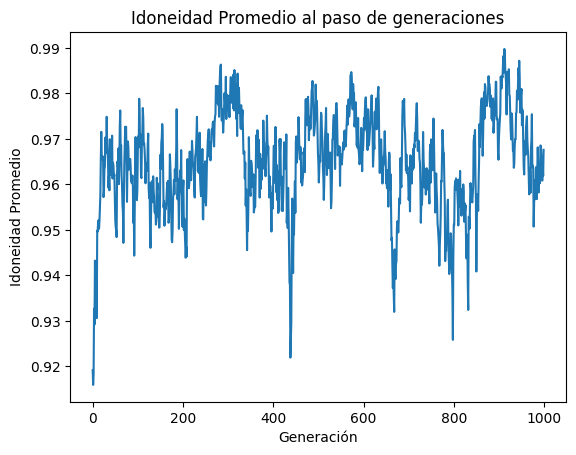

In [ ]:
#Gráfica a medida de paso de generaciones como se comporta la funcion de idoneidad promedio
plt.plot(list(range(len(historial_idoneidades))), historial_idoneidades)
plt.xlabel('Generación')
plt.ylabel('Idoneidad Promedio')
plt.title('Idoneidad Promedio al paso de generaciones')
plt.show()